# Filtering a Signal

This script applies a butterworth high-pass or low-pass filter an audio array, and finally illustrates it as a time series plot and spectrogram.

In [1]:
import sys
import numpy as np
import soundfile as sf
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
sys.path.insert(0, '/Users/omkarpatil/Documents/event_based_visual_microphone/utilities/')
import utility_folders as uf
import utility_spectrogram as us

<span style="color:red"> Provide the filter's cut-off frequency, type, audio's sample rate and file path bellow: </span>

There are 2 types of filters allowed by the code: `low` for low-pass or `high`for high-pass filter.

In [2]:
cutoff_freq = 140
filter_type = 'high'
sampling_rate = 2200
file_path = '/Volumes/Omkar 5T/dataset/window_dataset/chips1_events/chips1_0.wav'

The code bellow retrives the audio, applies a butterworth filter and nomalises the signal at the end.

In [3]:
audio_data, _ = uf.get_sound(file_path)

nyq = 0.5*sampling_rate
normal_cutoff = cutoff_freq/nyq
b, a = butter(10, normal_cutoff, btype=filter_type, analog=False)
S_x = filtfilt(b, a, audio_data)

# nyq = 0.5*sampling_rate
# normal_cutoff = 475/nyq
# b, a = butter(15, normal_cutoff, btype='low', analog=False)
# S_x = filtfilt(b, a, S_x)

maxsx = np.max(S_x)
minsx = np.min(S_x)
if maxsx!=1.0 or minsx!=-1.0:
    range_val = maxsx - minsx
    S_x = 2*S_x/range_val
    newmx = np.max(S_x)
    offset = newmx-1.0
    S_x = S_x-offset

This part allows you to hear and visualise the filtered signal.

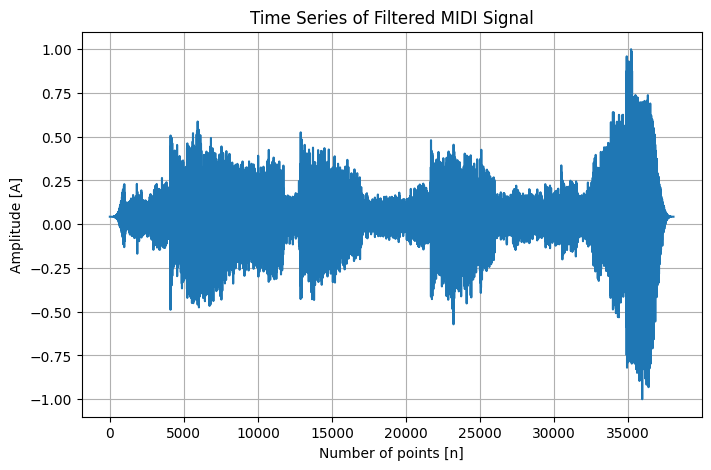

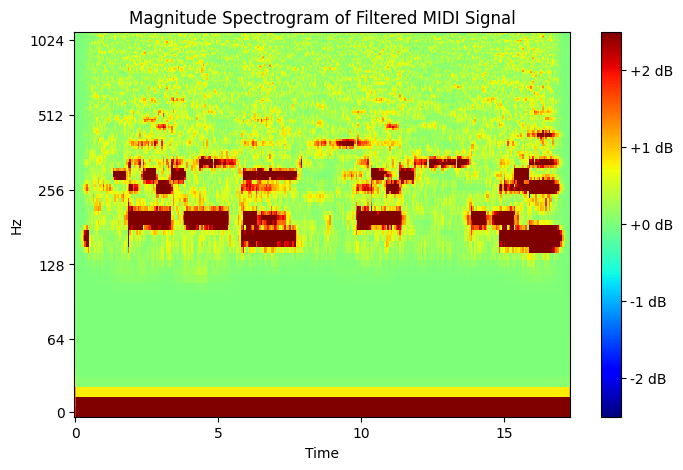

In [4]:
us.show_signal(S_x, 'Filtered MIDI')
us.show_spectrogram(S_x, sampling_rate, 256, 128, 'Filtered MIDI')
uf.play_sound(S_x, sampling_rate)

<span style="color:red"> Provide a save path for the filtered signal bellow: </span>

In [5]:
save_path = '/Volumes/Omkar 5T/filtered_chips1.wav'

This code saves the filtered signal.

In [6]:
sf.write(file=save_path, data=S_x, samplerate=sampling_rate)